In [514]:
import math

import pandas as pd
import numpy as np 
import scipy.stats as ss

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.decomposition import PCA

from statsmodels.formula.api import ols, logit
from statsmodels.tools.tools import add_constant
from statsmodels.stats.api import anova_lm

from scipy.stats import f_oneway

import matplotlib.pyplot as plt
import seaborn as sns


**CPD** = Continuous Probability Distribution

**DPD** = Discrete Probability Distribution

**CRV** = Continuous Random Variable

**DRV** = Disrete Random Variable

---

The **Beta Distribution** is a CPD used to model the uncercainty about the probability of success of an experiment. In other words, it models the probability of success (`p`) of a CRV whose outcomes range between a fixed interval (standard interval = [0, 1]). Therefore, `p` is the unknown CRV being modeled. The two paramteres the prior evidence of success plus one `a` and prior evidence of failure plus one `b`. Thus, `a` determines how much the distribution skews to the right (success), and `b` to the left (failure). One is added to both a and b due to the fact that Beta is a *conjugate prior* for Bernoulli and Binomial distribution in Bayesian inference.

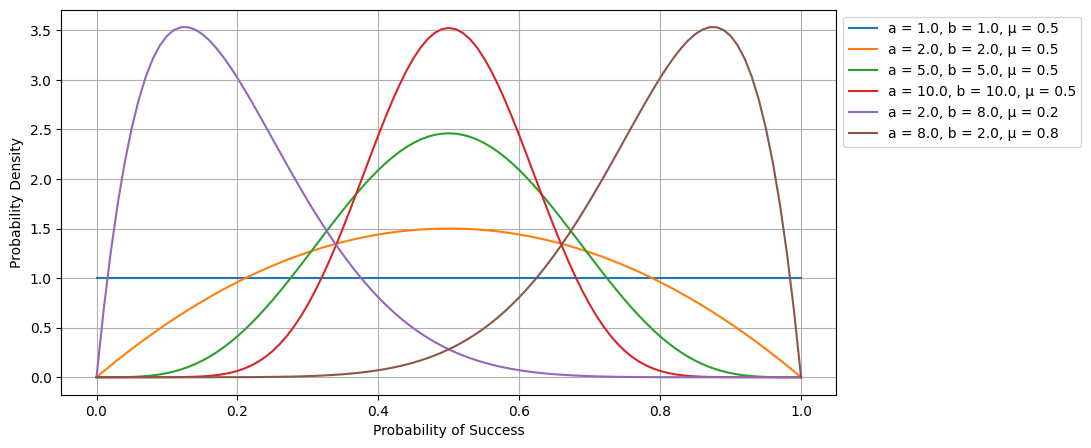

In [19]:
a = [1, 2, 5, 10, 2, 8] # number of successes plus 1
b = [1, 2, 5, 10, 8, 2] # number of failures plus 1

X = np.arange(0.0, 1.01, 1/100)

plt.figure(figsize = (10, 5))

beta = []
for a_, b_ in zip(a,b):
    beta.append(ss.beta.pdf(X, a = a_, b = b_))

    plt.plot(X, beta[-1], label = f"a = {a_:.1f}, b = {b_:.1f}, μ = {a_/(a_+b_):.1f}")

plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.xlabel('Probability of Success')
plt.ylabel('Probability Density')

plt.grid()

beta = np.stack(beta, 1)

Skewness of the Beta Distribution:

If **a > b**, the distribution is skewed to the right. This means that the mode of the distribution is closer to 0, indicating a higher likelihood of values closer to 0 (which can be interpreted as a lower probability of success, depending on your context).
If **a < b**, the distribution is skewed to the left. Here, the mode is closer to 1, suggesting a higher likelihood of values near 1 (interpreted as a higher probability of success).
If **a = b**, the distribution is symmetric. When a and b are equal, the distribution takes on a symmetric shape, often resembling a bell curve (when a and b are greater than 1) or a uniform distribution (when a and b are equal to 1).
Mean of the Beta Distribution:

The mean of the Beta distribution is **(a+b)/a**. This represents the expected value or the long-run average of the distribution. If a and b are parameters related to success and failure, respectively, then this mean can be interpreted as the expected probability of success.

Consider this abstract formulation of the Bayes theorem:

Posterior = (Likelihood x Prior) / Evidence

The *posterior* distribution is our updated belief about a parameter after observing the *evidence* generated from our model based on our *prior* assumption about the parameter (before seeing the evidence), weighted by the *likelihood* of observing this data given our assumption.

When you choose a prior such that its distribution is in the same family (has the same mathematical form) as the posterior distribution, then this prior is said to be a **conjugate** to the corresponding likehood function. Therefore, the Beta distribution is a conjugate to the Binomial distribution because when the prior is Beta and the likehood is Binomial, then the posterior will also be Beta, albeit with updated parameters given the new data. 

---

The **Student's t-Distribution** is a CPD that is used when estimating the *mean* of a normally distributed population when the **the sample size is small (<= 20ish)** and **the population standard deviation is unknown**. It is bell-shaped like the normal distribution, but has high values at the left and right tails of its distribution, meaning that it tends to produce more values far from the mean than the standard distribution.

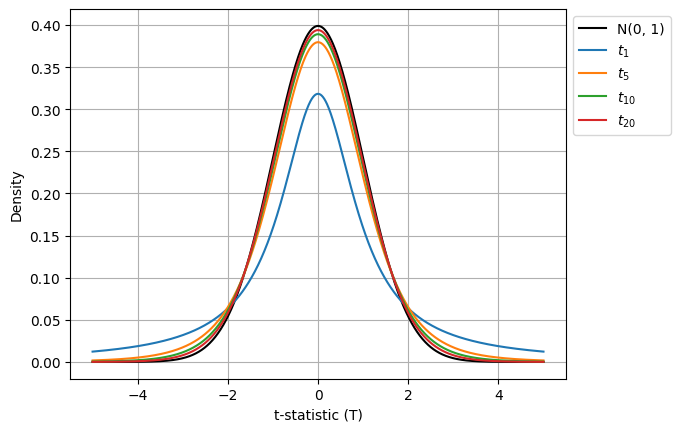

In [20]:
X = np.arange(-5, 5.01, 1/100)

norm_pdf = ss.norm.pdf(X)

plt.plot(X, norm_pdf, 'k', label = 'N(0, 1)')

dfs = [1, 5, 10, 20]

t_pdf = []
for df in dfs:
    t_pdf.append(ss.t.pdf(X, df = df))
    
    plt.plot(X, t_pdf[-1], label = f"$t_{{{df}}}$")

plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.xlabel('t-statistic (T)')
plt.ylabel('Density')
plt.grid()

t_pdf = np.stack(t_pdf, 1)



They main applications for the t-distribution is **1) hypothesis testing** and **2) constructing confidence intervals**, both when the sample size too small to use the normal distribution and the population standard deviation is unknown.

**Class Example**

ABC Poultry Farms supplies eggs. The company claims its eggs remain fresh for five days if refrigerated. An analyst samples 25 eggs to test this claim. The average freshness of eggs was 4.5 days, with a standard deviation of a day. If the company’s claim is true, find the probability of all selected eggs lasting about 4.5 days.

Prob(All selected eggs not lasting about 4.5 days) = 0.010
Prob(All selected eggs lasting about 4.5 days) = 0.990


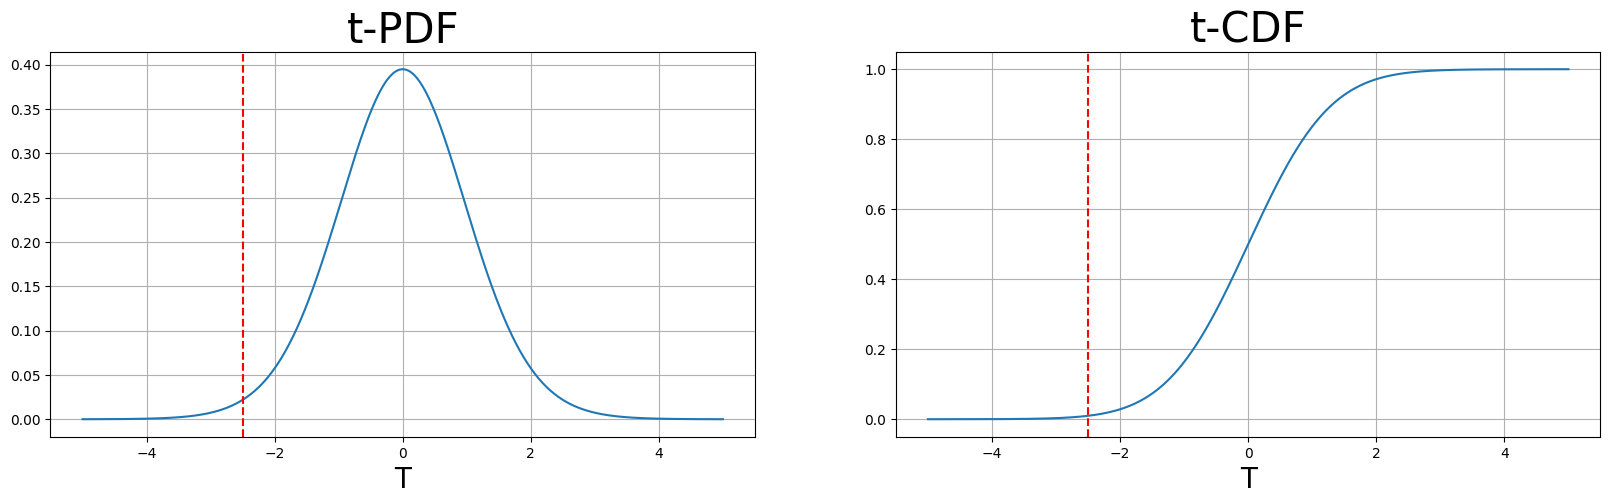

In [21]:
sample_size = 25
df = sample_size - 1
sample_mean = 4.5
sample_sdev = 1.0
se = sample_sdev / np.sqrt(sample_size) 

null_hyp = 5.0

t = (sample_mean - null_hyp) / se

p = ss.t.cdf(t, df = df) # probability of observing a t statistic equal or less than t

print(f"Prob(All selected eggs not lasting about 4.5 days) = {p:.3f}")
print(f"Prob(All selected eggs lasting about 4.5 days) = {1-p:.3f}")

fig, ax = plt.subplots(1, 2, figsize = (20 , 5))
ax[0].plot(X, ss.t.pdf(X, df = df))
ax[0].set_title('t-PDF', fontsize = 30)
ax[0].set_xlabel('T', fontsize = 20)
ax[0].axvline(x = t, color = 'r', linestyle = '--')
ax[0].grid()

ax[1].plot(X, ss.t.cdf(X, df = df))
ax[1].set_title('t-CDF', fontsize = 30)
ax[1].set_xlabel('T', fontsize = 20)
ax[1].axvline(x = t, color = 'r', linestyle = '--')
ax[1].grid()


---

The **Exponential Distribution** is a CPD that is used to model the time elapsed or space covered before an event occurs. More generally, it models the time/space between two independent events that occur at a constant average rate. It is a special case of the **Poisson** distribution, where the number of occurance, `k`, is fixed at one. There is a single parameter, the **average rate of occurance** λ, governing how quickly the exponential decay occurs. The key property of the exponential distribution is that it is **memoryless**, meaning that the probability of an event occuring within a given interval of time/space does not depend on the occurance of previous intervals.  

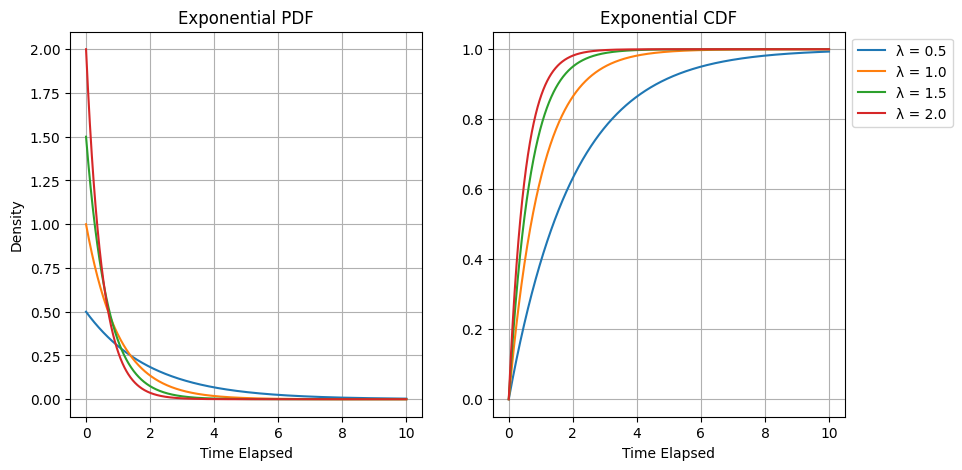

In [22]:
X = np.arange(0, 10.01, 1/100)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

λs = [0.5, 1.0, 1.5, 2.0]

expon_pdf, expon_cdf = [], []
for λ in λs:
    expon_pdf.append(ss.expon.pdf(X, scale = 1/λ))
    expon_cdf.append(ss.expon.cdf(X, scale = 1/λ))
    
    ax[0].plot(X, expon_pdf[-1], label = f"λ = {λ}")
    ax[1].plot(X, expon_cdf[-1], label = f"λ = {λ}")

plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))

ax[0].set_title('Exponential PDF')
ax[0].set_xlabel('Time Elapsed')

ax[1].set_title('Exponential CDF')
ax[1].set_xlabel('Time Elapsed')

ax[0].set_ylabel('Density')

ax[0].grid()
ax[1].grid()

expon_pdf = np.stack(expon_pdf, 1)
expon_cdf = np.stack(expon_cdf, 1)



**Class Example**

In the Northwest the waiting time between now and the moment when the next volcano erupts follows an exponential distribution with parameter 𝜆=0.1 events per year.
Let 𝑋 be the random variable representing the waiting time between now and the next eruption. What is the probability of an eruption in the next 50 years?

In [23]:
p = ss.expon.cdf(50, scale = 1/0.1)

print(f"Prob(An eruption will occur in the next 50 years = {p:0.2f})")

Prob(An eruption will occur in the next 50 years = 0.99)


---

The **f-Squared Distribution** is a CPD used  to model the distribution of the sum of a squared standard normal RVs. It is governed by a single parameter, the **degrees of freedom, k**, which is an integer. It's **mean** is k and its **variance** is 2k.

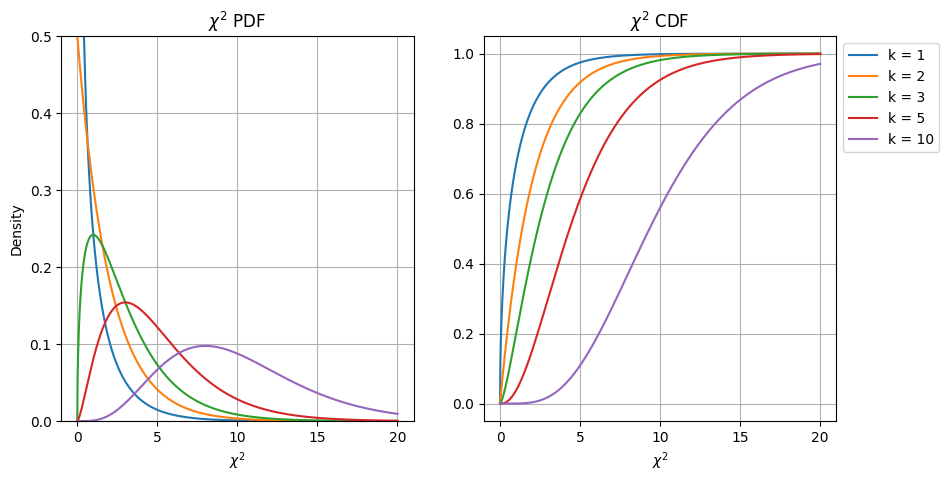

In [24]:
X = np.arange(0, 20.01, 1/100)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

dfs = [1, 2, 3, 5, 10]

chi_pdf, chi_cdf = [], []
for df in dfs:
    chi_pdf.append(ss.chi2.pdf(X, df = df))
    chi_cdf.append(ss.chi2.cdf(X, df = df))
    
    ax[0].plot(X, chi_pdf[-1], label = f"k = {df}")
    ax[1].plot(X, chi_cdf[-1], label = f"k = {df}")

plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))

ax[0].set_ylim([0, 0.5])
ax[0].set_title('$χ^2$ PDF')
ax[0].set_xlabel('$χ^2$')
ax[0].set_ylabel('Density')

ax[1].set_title('$χ^2$ CDF')
ax[1].set_xlabel('$χ^2$')
# ax[1].set_ylim([0, 1.0])


ax[0].grid()
ax[1].grid()

chi_pdf = np.stack(chi_pdf, 1)
chi_cdf = np.stack(chi_cdf, 1)


Fo k >= 90, the χ^2 distribution approximates the normal distribution.

χ^2 is applied to **cateegorical data** to perform two main tests:

    1. χ^2 goodness of fit
    2. χ^2 test of independence

**Class Example** 

Let's say you want to know if gender has anything to do with political party preference. You poll 440 voters in a simple random sample to find out which political party they prefer. The results of the survey are shown in the table below:

In [25]:
votes = pd.DataFrame({'Republican': [100, 140, 240],
                      'Democrat': [70, 60, 130],
                      'Independent': [30, 20, 50]},
                      index = ['Male', 'Female', 'Total'])

votes['Total'] = votes.sum(axis = 1)

votes

,Republican,Democrat,Independent,Total
Male,100,70,30,200
Female,140,60,20,220
Total,240,130,50,420


To see if gender is linked to political party preference, perform a Chi-Square test of independence using the following steps.

**Step 1: Define the Hypothesis.**

H0: There is no link between gender and political party preferences

H1: There is no link between gender and political party preferences

**Step 2: Calculate the expected Values for each cell.**

E = (Row Total) * (Column Total) / (Total Number of Observations)




In [26]:
row_total = votes.loc['Total', 'Republican':'Independent'].values
col_total = votes['Total'].values
sample_size = votes.loc['Total', 'Total']
df = (2 - 1)*(3 - 1)

E = []

for gender in votes.index.drop('Total'):
    for party in votes.drop(columns = ['Total']).columns:
        E.append((votes.loc['Total', party] * votes.loc[gender, 'Total']) / votes.loc['Total', 'Total'])


E = np.array(E).reshape(2, 3)
E = pd.DataFrame(E, columns = votes.columns[:3], index = votes.index[:2])
E['Total'] = E.sum(axis = 1)

E

,Republican,Democrat,Independent,Total
Male,114.285714,61.904762,23.809524,200.0
Female,125.714286,68.095238,26.190476,220.0


**Step 3: Calculate the χ^2 statistic and find the critical statistic.**

In [27]:
χ2 = ((votes.iloc[:2, :3] - E.iloc[:2, :3])**2/E.iloc[:2, :3]).values.sum()

alpha = 0.05 # significance level
χ2_crit = ss.chi2.ppf(1 - alpha, df)

print(f"χ^2 = {χ2:.3f}")
print(f"Critical χ^2 = {χ2_crit:.3f}")

χ^2 = 8.503
Critical χ^2 = 5.991


In [28]:
decision = 'Reject' if χ2 >= χ2_crit else 'Accept'

print(f"Decision: {decision} H0.")

Decision: Reject H0.


---

The **F-Distribution** (Fisher-Snedecor) is a CPF for comparing variances or testing the equality of means of multiple (> 2) populations. The most common statistical tests that rely on the F distribution are:

        1. Analysis of Variance (ANOVA)
        2. Regression Analsysis
        3. Quality Control
        4. Experimental Design

F is governed by two degrees of freedom, d1 and d2.

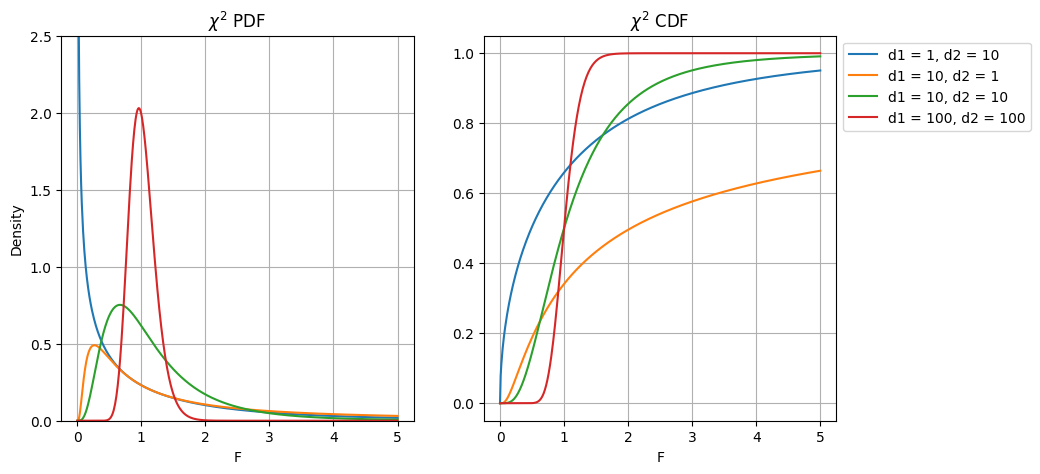

In [492]:
x = np.arange(0, 5.01, 1/100)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

df1 = [1, 10, 10, 100]
df2 = [10, 1, 10, 100]

f_pdf, f_cdf = [], []
for df1_, df2_ in zip(df1, df2):
        
    f_pdf.append(ss.f.pdf(x, df1_, df2_))
    f_cdf.append(ss.f.cdf(x, df1_, df2_))
    
    ax[0].plot(X, f_pdf[-1], label = f"d1 = {df1_}, d2 = {df2_}")
    ax[1].plot(X, f_cdf[-1], label = f"d1 = {df1_}, d2 = {df2_}")

plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))

ax[0].set_ylim([0, 2.5])
ax[0].set_title('$χ^2$ PDF')
ax[0].set_xlabel('F')
ax[0].set_ylabel('Density')

ax[1].set_title('$χ^2$ CDF')
ax[1].set_xlabel('F')
# ax[1].set_ylim([0, 1.0])


ax[0].grid()
ax[1].grid()

chi_pdf = np.stack(chi_pdf, 1)
chi_cdf = np.stack(chi_cdf, 1)


**Example** Analysis of Variance (ANOVA) using the `iris` dataset from `sklearn`.

In [527]:
# Load data
iris = datasets.load_iris()

# Features and label
X = iris['data']
feature_names = iris['feature_names']
feature_names = [name.replace(' ', '_').replace('_(cm)', '') for name in feature_names]

y = iris['target']
target_names = iris.target_names.tolist()

# Create dataframe
df = pd.DataFrame(X, columns = feature_names)
df['target'] = y

df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


To illustrate the distribution of means, let's box plot the length and width data for each flower species:

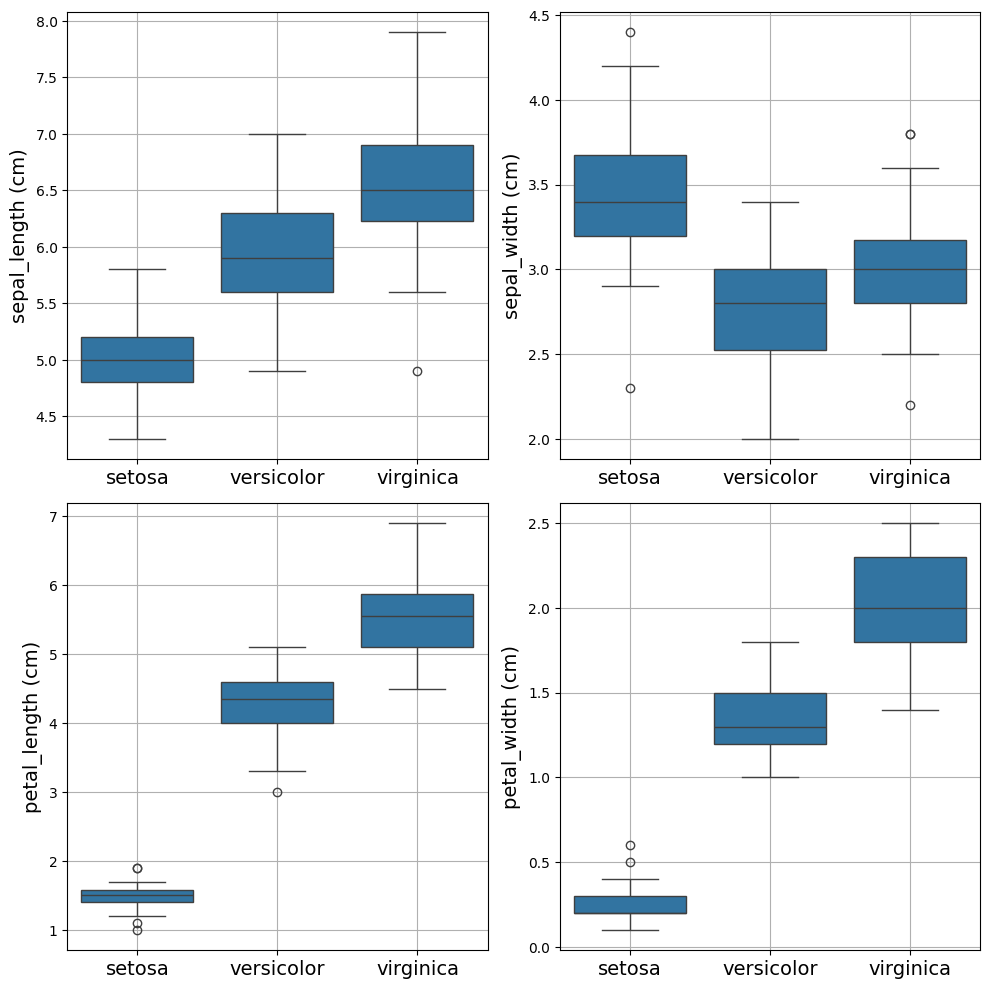

In [528]:
# Box plot to illustrate distribution of means

df_long = pd.melt(df, id_vars = ['target'], value_vars = feature_names, var_name = 'feature')

fig, ax = plt.subplots(2, 2, figsize = (10, 10))

axf = ax.flatten()
for i, fn in enumerate(feature_names):
    sns.boxplot(x = 'target', y = 'value', 
                data = df_long[df_long['feature'] == fn], 
                ax = axf[i])
    axf[i].set_xlabel(None)   
    axf[i].set_xticks(ticks = [0, 1, 2], 
                     labels = target_names,
                     fontsize = 14)         
    axf[i].set_ylabel(fn + ' (cm)', fontsize = 14)
    axf[i].grid()

plt.tight_layout()

Foe each feature, we see clearly that the amount of species-level differences is quite large **relative** to the amount of variability with each species.

We may now compare the group means statistically using the one-way F-test.

sepal_length: F = 119.265, p = 1.6696691907693826e-31
sepal_width: F = 49.160, p = 4.492017133309115e-17
petal_length: F = 1180.161, p = 2.8567766109615584e-91
petal_width: F = 960.007, p = 4.169445839443116e-85


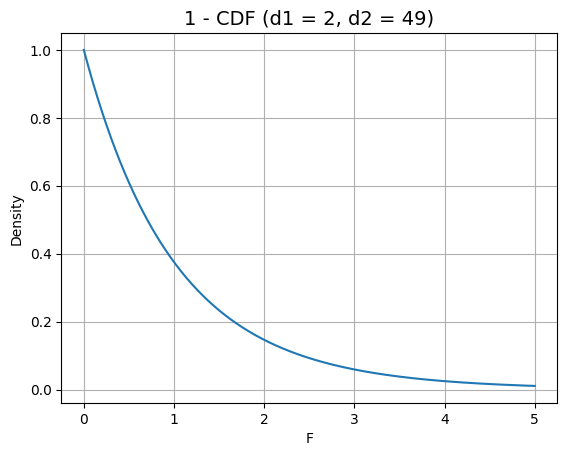

In [529]:
# Perform one-way F-test on the species-level differences for each feature separately.

F, p = [], []
for fn in feature_names:
    F_fn, p_fn = f_oneway(df[df['target'] == 0][fn],
                          df[df['target'] == 1][fn],
                          df[df['target'] == 2][fn])

    print(f"{fn}: F = {F_fn:.3f}, p = {p_fn}")                      

    F.append(F_fn)
    p.append(p_fn)  

x = np.arange(0, 5.01, 1/100)    
df1 = len(target_names) - 1
df2 = df.shape[0]//3 - 1
f_cdf = 1 - ss.f.cdf(x, df1, df2)

plt.plot(x, f_cdf) 
plt.grid()
plt.title(f"1 - CDF (d1 = {df1}, d2 = {df2})", fontsize = 14) ; 
plt.xlabel('F')
plt.ylabel('Density') ;


As anticipated, the F-statistics are very high with correspondingly very small p-values for all four features, evidence that the three species--setosa, versicolor, and virginica-- have different sepal and petal characteristics.

Here, we plot 1-CDF, since we are testing the significance of the F-statistic, which is based on 1 - signifance level (1 - 0.05).

In [530]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8,
                                                    random_state = 42)

# normalize data
scaler = MinMaxScaler() 

X_train_s = scaler.fit_transform(X_train) 
X_test_s = scaler.fit_transform(X_test) 

In [571]:
# Add a bias term to the training and test sets
X_train_s_1 = add_constant(X_train_s)
X_test_s_1 = add_constant(X_test_s)

# Create training and test dataframes
bias_feature_names = ['bias'] + feature_names
df_train = pd.DataFrame(X_train_s_1, columns = bias_feature_names)
df_train['target'] = y_train

df_test = pd.DataFrame(X_test_s_1, columns = bias_feature_names)
df_test['target'] = y_test

df_train.head()

,bias,sepal_length,sepal_width,petal_length,petal_width,target
0,1.0,0.088235,0.666667,0.000000,0.041667,0
1,1.0,0.411765,1.000000,0.087719,0.125000,0
2,1.0,0.705882,0.458333,0.596491,0.541667,1
3,1.0,0.147059,0.583333,0.105263,0.041667,0
4,1.0,0.029412,0.500000,0.052632,0.041667,0


Now, lets turn to the application of the F-statistic for ANOVA in linear regression. To do this, we will predict the sepal length from the other three features.

In [576]:
# Instantiate logistic regression model with training data
formula = 'sepal_length ~ ' + ' + '.join([name for name in bias_feature_names if name != 'sepal_length'])

print(f"Formula: {formula}")

model = ols(formula, data = df_train)

# Fit model
results = model.fit()

# Predict on training and test data
y_train_pred = results.predict(df_train.drop(['target','sepal_length'], axis = 1))
y_test_pred = results.predict(df_test.drop(['target','sepal_length'], axis = 1))

Formula: sepal_length ~ bias + sepal_width + petal_length + petal_width


We may now perform ANOVA on our linear model to examine the statistical signifiance of its regression coefficients.

In [577]:
# Perform ANOVA on our linear model
anova_summary = anova_lm(results)

# Display the signficant features (p-value < 0.05)
anova_summary.loc[anova_summary['PR(>F)'] < 0.05, :]

,df,sum_sq,mean_sq,F,PR(>F)
bias,1.0,0.127541,0.127541,14.801315,1.957918e-04
sepal_width,1.0,0.059883,0.059883,6.949480,9.531726e-03
petal_length,1.0,5.617094,5.617094,651.873308,1.974486e-49
petal_width,1.0,0.184494,0.184494,21.410813,9.721736e-06


We observe that the regression coefficients associated with all three features have high F-statistics and correspondingly low p-values, suggesting these to be significant predictors of the target variable. Petal length is especially strong, indicating that this features more predictive of sepal length than sepal or petal width.

---

**Monte Carlo Simulations** are probability-based models designed to simulate real-world phenomena or the outcomes of mathematical systems.

**Class Example** 

Suppose you want to estimate the average time it takes for a commuter to reach their workplace. You could assign probability distributions to variables like commute distance, traffic conditions, and travel speed. By running simulations with random inputs, you can estimate the average commute time.

Say that we were given knowledge about the categorical distribution for traffic conditions. We are told that there three main conditions: 0 = light, 1 = moderate, 2 = heavy. The probabilities for each condition are 30% for light, 50% for moderate, and 20% for heavy. Further, we are told that the traffic speeds are impacted by the conditions: light = 60 mi/h, moderate = 50 mi/h, heavy = 40 mi/h.

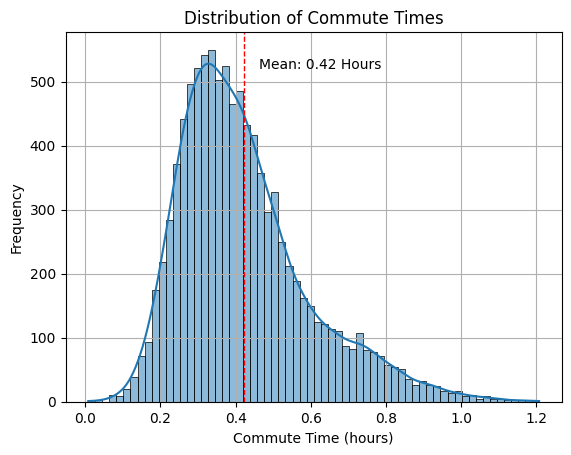

In [587]:
# Using numpy to perform the Monte Carlo simulation
np.random.seed(42)  # For reproducibility

# Define the number of simulations
num_simulations = 10000

# Assume a normal distribution for commute distances in kilometers
# Mean distance = 20 km, standard deviation = 5 km
distances = np.random.normal(20, 5, num_simulations)

traffic_conditions_probs = [0.3, 0.5, 0.2]
traffic_conditions = np.random.choice(['light', 'moderate', 'heavy'], 
                                       size=num_simulations, p=traffic_conditions_probs)

# Map traffic conditions to average speeds (km/h)
speeds = {'light': 70, 'moderate': 50, 'heavy': 30}

# Commute times
commute_times = np.array([distances[i] / speeds[condition] for i, condition in enumerate(traffic_conditions)])

# Mean and standard deviation of the commute times
mean_commute_time = np.mean(commute_times)
std_commute_time = np.std(commute_times)

# Plot the results
sns.histplot(commute_times, kde=True)
plt.title('Distribution of Commute Times')
plt.xlabel('Commute Time (hours)')
plt.ylabel('Frequency')
plt.grid()
plt.axvline(mean_commute_time, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_commute_time*1.1, max_ylim*0.9, f'Mean: {mean_commute_time:.2f} Hours') ;



We observse a distribution that is likely too complex to be modeled analytically using known distribution functions. Thus, our simulation provides a means to obtain an empirical estimate of the PDF of commute times, which can then be used for statistical inference.